**Install library Sastrawi dan textblob**

In [ ]:
!pip install sastrawi
!pip install textblob
!pip install pandas transformers torch

**Import Library dan connect Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import string
import nltk
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import STOPWORDS
from collections import Counter

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
import torch


data = pd.read_csv("/content/sample_data/BiayaPendidikan.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1185 non-null   int64  
 1   author            1185 non-null   object 
 2   description       1185 non-null   object 
 3   guid              1185 non-null   object 
 4   to                125 non-null    object 
 5   likecount         1185 non-null   int64  
 6   link              1185 non-null   object 
 7   pubdate           1185 non-null   object 
 8   replycount        1185 non-null   int64  
 9   title             1185 non-null   object 
 10  authorChannelUrl  1185 non-null   object 
 11  Unnamed: 11       0 non-null      float64
dtypes: float64(1), int64(3), object(8)
memory usage: 111.2+ KB


In [ ]:
data.drop_duplicates(subset="description", keep = "first", inplace = True)

df = pd.DataFrame(data['description'])
df.head(5)

,description
0,Pecat aja si Nadiem dari mendikbud...gak guna ...
1,"Nadim,pecat,korop😂😂😂😂😂"
2,Ahli gojek malah sok beralih jadi ahli mentri ...
3,Tangkap mui..umuk. Jabar..sunda empayer kjng j...
4,"Dasar nadim makaram,bikin karam nya dunia pend..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 0 to 1184
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1167 non-null   int64  
 1   author            1167 non-null   object 
 2   description       1167 non-null   object 
 3   guid              1167 non-null   object 
 4   to                112 non-null    object 
 5   likecount         1167 non-null   int64  
 6   link              1167 non-null   object 
 7   pubdate           1167 non-null   object 
 8   replycount        1167 non-null   int64  
 9   title             1167 non-null   object 
 10  authorChannelUrl  1167 non-null   object 
 11  Unnamed: 11       0 non-null      float64
dtypes: float64(1), int64(3), object(8)
memory usage: 118.5+ KB


In [ ]:
def remove_URL(tweet):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', str(tweet))

def remove_html(tweet):
  html = re.compile(r'<.*?')
  return html.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_number(tweet):
  tweet = re.sub(r'\d+','',tweet)
  return tweet

def remove_symbols(tweet):
  tweet = re.sub(r'[^a-zA-Z0-9\s]','', tweet)
  return tweet

df['cleansing']=df['description'].apply(lambda x: remove_URL(x))
df['cleansing']=df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing']=df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing']=df['cleansing'].apply(lambda x: remove_number(x))
df['cleansing']=df['cleansing'].apply(lambda x: remove_symbols(x))

df.head(10)

,description,cleansing
0,Pecat aja si Nadiem dari mendikbud...gak guna ...,Pecat aja si Nadiem dari mendikbudgak guna dia...
1,"Nadim,pecat,korop😂😂😂😂😂",Nadimpecatkorop
2,Ahli gojek malah sok beralih jadi ahli mentri ...,Ahli gojek malah sok beralih jadi ahli mentri ...
3,Tangkap mui..umuk. Jabar..sunda empayer kjng j...,Tangkap muiumuk Jabarsunda empayer kjng jengkj...
4,"Dasar nadim makaram,bikin karam nya dunia pend...",Dasar nadim makarambikin karam nya dunia pendi...
5,nadim cuma coba coba menerapkan ide hayalan di...,nadim cuma coba coba menerapkan ide hayalan di...
6,Enaknya mentri satu ini buang kelaut biar dima...,Enaknya mentri satu ini buang kelaut biar dima...
7,Debat marah² tapi cuma setingan jir,Debat marah tapi cuma setingan jir
8,betul pak.. tindakan korupsi juga tidak manusi...,betul pak tindakan korupsi juga tidak manusiaw...
9,Semangat wakil rakyat perjuangkan rakyat kecil...,Semangat wakil rakyat perjuangkan rakyat kecil...


In [ ]:
def case_folding(text):
  if isinstance(text,str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text
df['case_folding']=df['cleansing'].apply(case_folding)

df.head(10)

,description,cleansing,case_folding
0,Pecat aja si Nadiem dari mendikbud...gak guna ...,Pecat aja si Nadiem dari mendikbudgak guna dia...,pecat aja si nadiem dari mendikbudgak guna dia...
1,"Nadim,pecat,korop😂😂😂😂😂",Nadimpecatkorop,nadimpecatkorop
2,Ahli gojek malah sok beralih jadi ahli mentri ...,Ahli gojek malah sok beralih jadi ahli mentri ...,ahli gojek malah sok beralih jadi ahli mentri ...
3,Tangkap mui..umuk. Jabar..sunda empayer kjng j...,Tangkap muiumuk Jabarsunda empayer kjng jengkj...,tangkap muiumuk jabarsunda empayer kjng jengkj...
4,"Dasar nadim makaram,bikin karam nya dunia pend...",Dasar nadim makarambikin karam nya dunia pendi...,dasar nadim makarambikin karam nya dunia pendi...
5,nadim cuma coba coba menerapkan ide hayalan di...,nadim cuma coba coba menerapkan ide hayalan di...,nadim cuma coba coba menerapkan ide hayalan di...
6,Enaknya mentri satu ini buang kelaut biar dima...,Enaknya mentri satu ini buang kelaut biar dima...,enaknya mentri satu ini buang kelaut biar dima...
7,Debat marah² tapi cuma setingan jir,Debat marah tapi cuma setingan jir,debat marah tapi cuma setingan jir
8,betul pak.. tindakan korupsi juga tidak manusi...,betul pak tindakan korupsi juga tidak manusiaw...,betul pak tindakan korupsi juga tidak manusiaw...
9,Semangat wakil rakyat perjuangkan rakyat kecil...,Semangat wakil rakyat perjuangkan rakyat kecil...,semangat wakil rakyat perjuangkan rakyat kecil...


In [ ]:
def tokenize(text):
    if isinstance(text, str):
        tokens = text.split()
        return tokens
    return []

df['tokenize'] = df['case_folding'].apply(tokenize)

df.head(10)

,description,cleansing,case_folding,tokenize
0,Pecat aja si Nadiem dari mendikbud...gak guna ...,Pecat aja si Nadiem dari mendikbudgak guna dia...,pecat aja si nadiem dari mendikbudgak guna dia...,"[pecat, aja, si, nadiem, dari, mendikbudgak, g..."
1,"Nadim,pecat,korop😂😂😂😂😂",Nadimpecatkorop,nadimpecatkorop,[nadimpecatkorop]
2,Ahli gojek malah sok beralih jadi ahli mentri ...,Ahli gojek malah sok beralih jadi ahli mentri ...,ahli gojek malah sok beralih jadi ahli mentri ...,"[ahli, gojek, malah, sok, beralih, jadi, ahli,..."
3,Tangkap mui..umuk. Jabar..sunda empayer kjng j...,Tangkap muiumuk Jabarsunda empayer kjng jengkj...,tangkap muiumuk jabarsunda empayer kjng jengkj...,"[tangkap, muiumuk, jabarsunda, empayer, kjng, ..."
4,"Dasar nadim makaram,bikin karam nya dunia pend...",Dasar nadim makarambikin karam nya dunia pendi...,dasar nadim makarambikin karam nya dunia pendi...,"[dasar, nadim, makarambikin, karam, nya, dunia..."
5,nadim cuma coba coba menerapkan ide hayalan di...,nadim cuma coba coba menerapkan ide hayalan di...,nadim cuma coba coba menerapkan ide hayalan di...,"[nadim, cuma, coba, coba, menerapkan, ide, hay..."
6,Enaknya mentri satu ini buang kelaut biar dima...,Enaknya mentri satu ini buang kelaut biar dima...,enaknya mentri satu ini buang kelaut biar dima...,"[enaknya, mentri, satu, ini, buang, kelaut, bi..."
7,Debat marah² tapi cuma setingan jir,Debat marah tapi cuma setingan jir,debat marah tapi cuma setingan jir,"[debat, marah, tapi, cuma, setingan, jir]"
8,betul pak.. tindakan korupsi juga tidak manusi...,betul pak tindakan korupsi juga tidak manusiaw...,betul pak tindakan korupsi juga tidak manusiaw...,"[betul, pak, tindakan, korupsi, juga, tidak, m..."
9,Semangat wakil rakyat perjuangkan rakyat kecil...,Semangat wakil rakyat perjuangkan rakyat kecil...,semangat wakil rakyat perjuangkan rakyat kecil...,"[semangat, wakil, rakyat, perjuangkan, rakyat,..."


In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['filtering/stopword removal'] = df ['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,description,cleansing,case_folding,tokenize,filtering/stopword removal
0,Pecat aja si Nadiem dari mendikbud...gak guna ...,Pecat aja si Nadiem dari mendikbudgak guna dia...,pecat aja si nadiem dari mendikbudgak guna dia...,"[pecat, aja, si, nadiem, dari, mendikbudgak, g...","[pecat, aja, si, nadiem, mendikbudgak, jd, men..."
1,"Nadim,pecat,korop😂😂😂😂😂",Nadimpecatkorop,nadimpecatkorop,[nadimpecatkorop],[nadimpecatkorop]
2,Ahli gojek malah sok beralih jadi ahli mentri ...,Ahli gojek malah sok beralih jadi ahli mentri ...,ahli gojek malah sok beralih jadi ahli mentri ...,"[ahli, gojek, malah, sok, beralih, jadi, ahli,...","[ahli, gojek, sok, beralih, ahli, mentri, pend..."
3,Tangkap mui..umuk. Jabar..sunda empayer kjng j...,Tangkap muiumuk Jabarsunda empayer kjng jengkj...,tangkap muiumuk jabarsunda empayer kjng jengkj...,"[tangkap, muiumuk, jabarsunda, empayer, kjng, ...","[tangkap, muiumuk, jabarsunda, empayer, kjng, ..."
4,"Dasar nadim makaram,bikin karam nya dunia pend...",Dasar nadim makarambikin karam nya dunia pendi...,dasar nadim makarambikin karam nya dunia pendi...,"[dasar, nadim, makarambikin, karam, nya, dunia...","[dasar, nadim, makarambikin, karam, nya, dunia..."
5,nadim cuma coba coba menerapkan ide hayalan di...,nadim cuma coba coba menerapkan ide hayalan di...,nadim cuma coba coba menerapkan ide hayalan di...,"[nadim, cuma, coba, coba, menerapkan, ide, hay...","[nadim, coba, coba, menerapkan, ide, hayalan]"
6,Enaknya mentri satu ini buang kelaut biar dima...,Enaknya mentri satu ini buang kelaut biar dima...,enaknya mentri satu ini buang kelaut biar dima...,"[enaknya, mentri, satu, ini, buang, kelaut, bi...","[enaknya, mentri, buang, kelaut, biar, dimakan..."
7,Debat marah² tapi cuma setingan jir,Debat marah tapi cuma setingan jir,debat marah tapi cuma setingan jir,"[debat, marah, tapi, cuma, setingan, jir]","[debat, marah, setingan, jir]"
8,betul pak.. tindakan korupsi juga tidak manusi...,betul pak tindakan korupsi juga tidak manusiaw...,betul pak tindakan korupsi juga tidak manusiaw...,"[betul, pak, tindakan, korupsi, juga, tidak, m...","[tindakan, korupsi, manusiawi, semoga, ajh, an..."
9,Semangat wakil rakyat perjuangkan rakyat kecil...,Semangat wakil rakyat perjuangkan rakyat kecil...,semangat wakil rakyat perjuangkan rakyat kecil...,"[semangat, wakil, rakyat, perjuangkan, rakyat,...","[semangat, wakil, rakyat, perjuangkan, rakyat,..."


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

df['stemming_data']= df['filtering/stopword removal'].apply(lambda x: ' '.join(stem_text(x)))

df.head(10)



,description,cleansing,case_folding,tokenize,filtering/stopword removal,stemming_data
0,Pecat aja si Nadiem dari mendikbud...gak guna ...,Pecat aja si Nadiem dari mendikbudgak guna dia...,pecat aja si nadiem dari mendikbudgak guna dia...,"[pecat, aja, si, nadiem, dari, mendikbudgak, g...","[pecat, aja, si, nadiem, mendikbudgak, jd, men...",pecat aja si nadiem mendikbudgak jd mendikbud ...
1,"Nadim,pecat,korop😂😂😂😂😂",Nadimpecatkorop,nadimpecatkorop,[nadimpecatkorop],[nadimpecatkorop],nadimpecatkorop
2,Ahli gojek malah sok beralih jadi ahli mentri ...,Ahli gojek malah sok beralih jadi ahli mentri ...,ahli gojek malah sok beralih jadi ahli mentri ...,"[ahli, gojek, malah, sok, beralih, jadi, ahli,...","[ahli, gojek, sok, beralih, ahli, mentri, pend...",ahli gojek sok alih ahli tri didik
3,Tangkap mui..umuk. Jabar..sunda empayer kjng j...,Tangkap muiumuk Jabarsunda empayer kjng jengkj...,tangkap muiumuk jabarsunda empayer kjng jengkj...,"[tangkap, muiumuk, jabarsunda, empayer, kjng, ...","[tangkap, muiumuk, jabarsunda, empayer, kjng, ...",tangkap muiumuk jabarsunda empayer kjng jengkj...
4,"Dasar nadim makaram,bikin karam nya dunia pend...",Dasar nadim makarambikin karam nya dunia pendi...,dasar nadim makarambikin karam nya dunia pendi...,"[dasar, nadim, makarambikin, karam, nya, dunia...","[dasar, nadim, makarambikin, karam, nya, dunia...",dasar nadim makarambikin karam nya dunia pendi...
5,nadim cuma coba coba menerapkan ide hayalan di...,nadim cuma coba coba menerapkan ide hayalan di...,nadim cuma coba coba menerapkan ide hayalan di...,"[nadim, cuma, coba, coba, menerapkan, ide, hay...","[nadim, coba, coba, menerapkan, ide, hayalan]",nadim coba coba terap ide hayalan
6,Enaknya mentri satu ini buang kelaut biar dima...,Enaknya mentri satu ini buang kelaut biar dima...,enaknya mentri satu ini buang kelaut biar dima...,"[enaknya, mentri, satu, ini, buang, kelaut, bi...","[enaknya, mentri, buang, kelaut, biar, dimakan...",enak tri buang laut biar makan ikan hiu
7,Debat marah² tapi cuma setingan jir,Debat marah tapi cuma setingan jir,debat marah tapi cuma setingan jir,"[debat, marah, tapi, cuma, setingan, jir]","[debat, marah, setingan, jir]",debat marah ting jir
8,betul pak.. tindakan korupsi juga tidak manusi...,betul pak tindakan korupsi juga tidak manusiaw...,betul pak tindakan korupsi juga tidak manusiaw...,"[betul, pak, tindakan, korupsi, juga, tidak, m...","[tindakan, korupsi, manusiawi, semoga, ajh, an...",tindak korupsi manusiawi moga ajh anggota dpr ...
9,Semangat wakil rakyat perjuangkan rakyat kecil...,Semangat wakil rakyat perjuangkan rakyat kecil...,semangat wakil rakyat perjuangkan rakyat kecil...,"[semangat, wakil, rakyat, perjuangkan, rakyat,...","[semangat, wakil, rakyat, perjuangkan, rakyat,...",semangat wakil rakyat juang rakyat yg anak kul...


In [ ]:
df.to_csv('Hasil-preprocessing-data.csv', encoding='utf8', index=False)

**REVISI**

In [ ]:
def load_data():
  data = pd.read_csv('/content/Hasil-preprocessing-data.csv')
  return data
data = load_data()
data.head(4)

data.info()

df = pd.DataFrame(data['stemming_data'])
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   description                 1167 non-null   object
 1   cleansing                   1162 non-null   object
 2   case_folding                1162 non-null   object
 3   tokenize                    1167 non-null   object
 4   filtering/stopword removal  1167 non-null   object
 5   stemming_data               1159 non-null   object
dtypes: object(6)
memory usage: 54.8+ KB


,stemming_data
0,pecat aja si nadiem mendikbudgak jd mendikbud ...
1,nadimpecatkorop
2,ahli gojek sok alih ahli tri didik
3,tangkap muiumuk jabarsunda empayer kjng jengkj...
4,dasar nadim makarambikin karam nya dunia pendi...
5,nadim coba coba terap ide hayalan
6,enak tri buang laut biar makan ikan hiu
7,debat marah ting jir
8,tindak korupsi manusiawi moga ajh anggota dpr ...
9,semangat wakil rakyat juang rakyat yg anak kul...


**Labeling**

In [ ]:
labels = []
scores = []

for text in df['stemming_data'].astype(str):
  blob = TextBlob(text)
  polarity = blob.sentiment.polarity

  if polarity > 0:
    label = 'positif'
  elif polarity < 0:
    label = 'negatif'
  else:
    label ='netral'

  scores.append(polarity)
  labels.append(label)

df['sentiment_score'] = scores
df['sentiment'] = labels

data = ['stemming_data', 'sentiment_score', 'sentiment']
data = df[data]

data.head(10)

,stemming_data,sentiment_score,sentiment
0,pecat aja si nadiem mendikbudgak jd mendikbud ...,0.00,netral
1,nadimpecatkorop,0.00,netral
2,ahli gojek sok alih ahli tri didik,0.00,netral
3,tangkap muiumuk jabarsunda empayer kjng jengkj...,0.25,positif
4,dasar nadim makarambikin karam nya dunia pendi...,0.00,netral
5,nadim coba coba terap ide hayalan,0.00,netral
6,enak tri buang laut biar makan ikan hiu,0.00,netral
7,debat marah ting jir,0.00,netral
8,tindak korupsi manusiawi moga ajh anggota dpr ...,0.00,netral
9,semangat wakil rakyat juang rakyat yg anak kul...,0.00,netral


<ipython-input-26-5317680116a1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


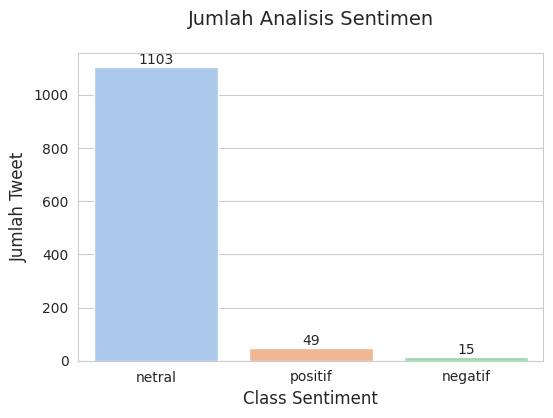

In [ ]:
sentiment_count = data['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
  ax.text(i, count+0.10, str(count), ha='center', va='bottom')

In [ ]:
data.to_csv('Hasil_textblob.csv', encoding='utf8', index=False)

**LABELING INDOBERT**

In [ ]:
# Load IndoBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = BertForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p1", num_labels=3)

# Create a sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

# Lists to store sentiment scores and labels
labels = []

# Loop through each comment in the 'stemming_data' column
for text in df['stemming_data'].astype(str):
    # Perform sentiment analysis
    result = sentiment_analysis(text)[0]

    # Get the label from the result
    label = result['label']

    # Append the label to the labels list
    if label == 'LABEL_0':
        labels.append('negatif')
    elif label == 'LABEL_1':
        labels.append('netral')
    else:
        labels.append('positif')

# Add the sentiment labels to the DataFrame
df['sentiment'] = labels

# Select only the relevant columns
data = df[['stemming_data', 'sentiment']]

# Display the first 5 rows of the resulting DataFrame
print(data.head(5))

                                       stemming_data sentiment
0  pecat aja si nadiem mendikbudgak jd mendikbud ...    netral
1                                    nadimpecatkorop   negatif
2                 ahli gojek sok alih ahli tri didik   negatif
3  tangkap muiumuk jabarsunda empayer kjng jengkj...    netral
4  dasar nadim makarambikin karam nya dunia pendi...    netral


<ipython-input-30-deb18fe01142>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


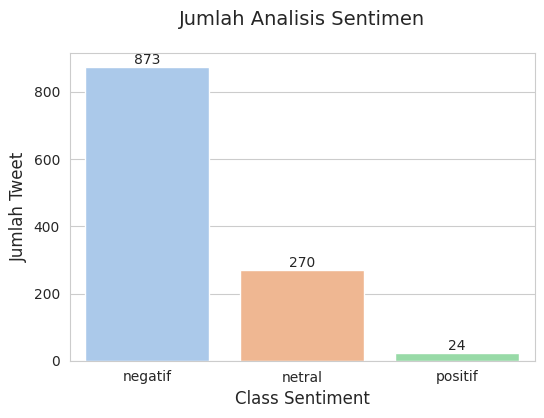

In [ ]:
#Kode tersebut menghitung jumlah tiap kelas sentimen dalam kolom 'sentiment' pada data,
#dan kemudian membuat plot batang menggunakan seaborn untuk menampilkan jumlah tersebut.
#Pertama, setelan gaya seaborn diatur ke 'whitegrid'. Selanjutnya, sebuah figur dan sumbu diciptakan dengan ukuran 6x4 inci,
#kemudian plot batang dibuat dengan sumbu x berupa kelas sentimen dan sumbu y berupa jumlah masing-masing kelas, menggunakan palet warna 'pastel'.
#Judul, label sumbu x, dan label sumbu y ditambahkan dengan ukuran font yang sesuai.
#Setelah itu, jumlah tiap kelas sentimen ditampilkan di atas masing-masing batang dengan sedikit jarak ke atas agar mudah terbaca.
#Terakhir, grafik tersebut ditampilkan menggunakan plt.show().

sentiment_count = data['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
  ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()


In [ ]:
data.to_csv('Hasil-labeling-data-indoBERT-BiayaPendidikan.csv', encoding='utf8', index=False) #Mendownload hasil labeling IndoBERT

**WORDCLOUD**

In [ ]:
data = pd.read_csv("/content/Hasil-labeling-data-indoBERT-BiayaPendidikan.csv")
data.head()

,stemming_data,sentiment
0,pecat aja si nadiem mendikbudgak jd mendikbud ...,netral
1,nadimpecatkorop,negatif
2,ahli gojek sok alih ahli tri didik,negatif
3,tangkap muiumuk jabarsunda empayer kjng jengkj...,netral
4,dasar nadim makarambikin karam nya dunia pendi...,netral


In [ ]:
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
negatif    873
netral     270
positif     24
Name: count, dtype: int64


In [ ]:
data['Review_len'] = [len(t) if isinstance(t, str) else 0 for t in data.stemming_data]
data.head(4)

#


,stemming_data,sentiment,Review_len
0,pecat aja si nadiem mendikbudgak jd mendikbud ...,netral,123
1,nadimpecatkorop,negatif,15
2,ahli gojek sok alih ahli tri didik,negatif,34
3,tangkap muiumuk jabarsunda empayer kjng jengkj...,netral,180


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stemming_data  1159 non-null   object
 1   sentiment      1167 non-null   object
 2   Review_len     1167 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 27.5+ KB


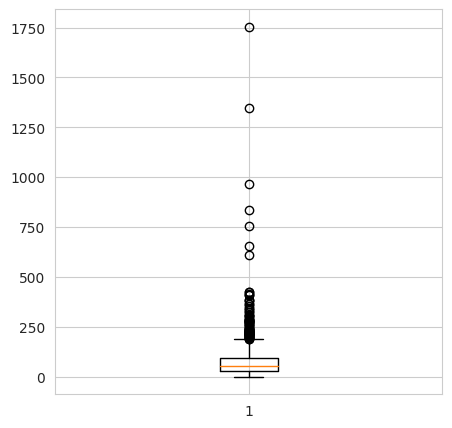

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(data.Review_len)
plt.show()

In [ ]:
data[data.Review_len > 200].head()

,stemming_data,sentiment,Review_len
17,kaya bobrok bgt dunia didik uda sekolah mahal ...,negatif,286
39,pa dede diskusi naik ukt diskusi gimana ukt tu...,negatif,324
63,tri sdh kena semprot kanan kiri tp dataraja gk...,positif,239
69,anak anak bangsa indonesia suruh bodohsengaja ...,netral,223
73,wakil dr camaba jalur snbp kmren sdh terima pt...,positif,279


*4. Membuat Word Cloud dari ulasan negatif dan positif
Word cloud adalah representasi grafis dari kata-kata yang sering digunakan dalam kumpulan file teks. Tinggi setiap kata dalam gambar ini menunjukkan frekuensi kemunculan kata tersebut di seluruh teks. Diagram semacam ini sangat berguna saat melakukan analisis teks.

Diagram ini memberikan gambaran umum tentang jenis kata yang sering muncul dalam korpus, dengan cara yang cepat dan sederhana.

4.1 Menyaring ulasan film positif dan negatif*

In [ ]:
neg_review = data[data['sentiment'] == 'negatif']
neg_words =[]
for t in neg_review.stemming_data:
    neg_words.append(t)
neg_words[:4]

['nadimpecatkorop',
 'ahli gojek sok alih ahli tri didik',
 'nadim coba coba terap ide hayalan',
 'enak tri buang laut biar makan ikan hiu']

In [ ]:
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]

'nadimpecatkorop ahli gojek sok alih ahli tri didik nadim coba coba terap ide hayalan enak tri buang '

In [ ]:
for t in neg_review.stemming_data[:300]:
    if isinstance(t, str) and 'baik' in t:
        print(t)


ganti baju seragam sekolah ukt x lipay mendikbut baik dunia do tahan jokowi


In [ ]:
pos_review = data[data['sentiment'] == 'positif']
pos_string = []
for t in pos_review.stemming_data:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat(sep=' ')
pos_text[:100]

'ya lh dri aja nadiem udah ngk beres yg sya heran knpa org bsa jdi tri didik d sulit dgn biaya mahalm'

4.2 Word Cloud for negatively classified Review

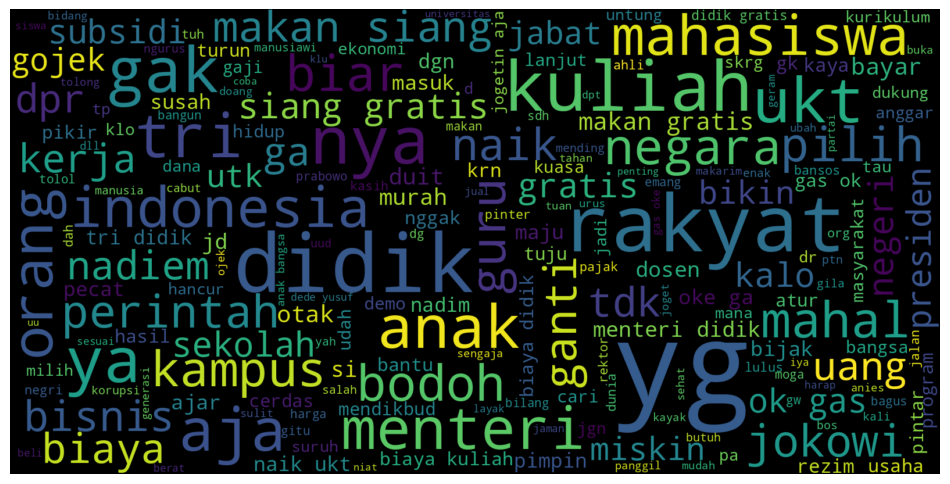

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
words = neg_text.split()
# Remove common stop words
filtered_words = [word for word in words if word.lower() not in STOPWORDS]

# Count the frequency of each word
word_freq = Counter(filtered_words)

# Sort the words by frequency in descending order
sorted_word_freq = word_freq.most_common()

# Print the list of words and their frequencies
print("Words shown in the word cloud and their frequencies (ranked):")
for word, freq in sorted_word_freq:
    print(f"{word}: {freq}")

Words shown in the word cloud and their frequencies (ranked):
yg: 361
didik: 224
rakyat: 141
kuliah: 122
gratis: 118
ukt: 105
tri: 100
aja: 100
menteri: 98
makan: 94
nya: 94
gak: 91
anak: 88
orang: 87
ya: 85
biaya: 81
gas: 73
indonesia: 71
mahasiswa: 67
naik: 67
biar: 55
mahal: 55
ga: 54
bodoh: 54
negara: 54
ganti: 53
guru: 53
kampus: 53
nadiem: 51
pilih: 51
jokowi: 51
ok: 50
siang: 47
perintah: 46
tdk: 45
si: 43
bangsa: 43
bisnis: 42
presiden: 39
dpr: 38
kerja: 38
bikin: 38
oke: 38
uang: 38
subsidi: 38
nadim: 36
sekolah: 36
miskin: 36
negeri: 36
kalo: 35
hidup: 33
bayar: 33
cerdas: 32
gojek: 31
jabat: 31
utk: 31
otak: 29
ajar: 29
duit: 28
kaya: 28
murah: 27
atur: 25
jd: 25
dosen: 25
bijak: 24
masuk: 24
pecat: 23
susah: 23
dgn: 23
maju: 23
pimpin: 23
milih: 22
gaji: 21
makarim: 21
rezim: 21
krn: 21
pikir: 20
gk: 20
bantu: 20
hasil: 20
nggak: 20
usaha: 20
jogetin: 20
pintar: 19
turun: 19
tuju: 19
mendikbud: 19
program: 19
dede: 18
udah: 18
cari: 18
masyarakat: 18
lanjut: 18
demo: 18
man

In [ ]:
# Sort the words by frequency in descending order and get the top 10
top_10_word_freq = word_freq.most_common(10)

# Print the top 10 words and their frequencies
print("Top 10 words shown in the word cloud and their frequencies:")
for word, freq in top_10_word_freq:
    print(f"{word}: {freq}")

Top 10 words shown in the word cloud and their frequencies:
yg: 361
didik: 224
rakyat: 141
kuliah: 122
gratis: 118
ukt: 105
tri: 100
aja: 100
menteri: 98
makan: 94


4.3 Word Cloud for positively classified Review

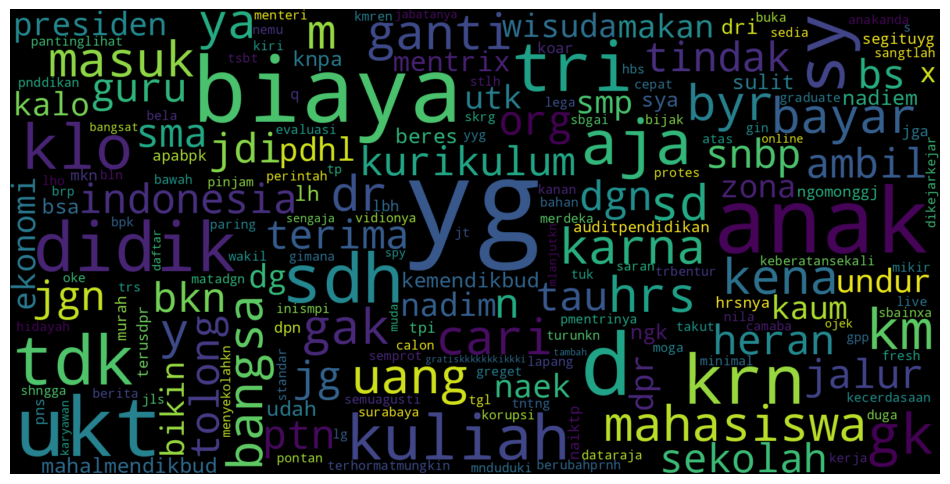

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
words = pos_text.split()
# Remove common stop words
filtered_words = [word for word in words if word.lower() not in STOPWORDS]

# Count the frequency of each word
word_freq = Counter(filtered_words)

# Sort the words by frequency in descending order
sorted_word_freq = word_freq.most_common()

# Print the list of words and their frequencies
print("Words shown in the word cloud and their frequencies (ranked):")
for word, freq in sorted_word_freq:
    print(f"{word}: {freq}")

Words shown in the word cloud and their frequencies (ranked):
yg: 20
biaya: 11
anak: 11
d: 10
ukt: 9
tri: 6
didik: 6
tdk: 6
sdh: 6
krn: 6
sy: 6
aja: 5
klo: 5
kuliah: 5
gk: 4
km: 4
ya: 3
hrs: 3
byr: 3
kena: 3
bangsa: 3
sd: 3
dr: 3
uang: 3
cari: 3
ganti: 3
gak: 3
bayar: 3
mahasiswa: 3
masuk: 3
karna: 3
y: 3
m: 3
heran: 2
org: 2
jdi: 2
dgn: 2
n: 2
indonesia: 2
bkn: 2
jgn: 2
ambil: 2
tindak: 2
jg: 2
sekolah: 2
kurikulum: 2
guru: 2
tau: 2
jalur: 2
snbp: 2
terima: 2
ptn: 2
bs: 2
tolong: 2
sma: 2
presiden: 2
utk: 2
naek: 2
makan: 2
kaum: 2
dg: 2
undur: 2
wisuda: 2
dpr: 2
nadim: 2
pdhl: 2
smp: 2
zona: 2
bikin: 2
ekonomi: 2
kalo: 2
mentrix: 2
x: 2
lh: 1
dri: 1
nadiem: 1
udah: 1
ngk: 1
beres: 1
sya: 1
knpa: 1
bsa: 1
sulit: 1
mahalmendikbud: 1
kemendikbud: 1
auditpendidikan: 1
hrsnya: 1
lbh: 1
murah: 1
terusdpr: 1
jga: 1
koar: 1
dpn: 1
tpi: 1
q: 1
ngomonggj: 1
pns: 1
naiktp: 1
segituyg: 1
mkn: 1
apabpk: 1
terhormatmungkin: 1
anakanda: 1
keberatansekali: 1
buka: 1
matadgn: 1
merdeka: 1
pontan: 1
p

In [ ]:
# Sort the words by frequency in descending order and get the top 10
top_10_word_freq = word_freq.most_common(10)

# Print the top 10 words and their frequencies
print("Top 10 words shown in the word cloud and their frequencies:")
for word, freq in top_10_word_freq:
    print(f"{word}: {freq}")

Top 10 words shown in the word cloud and their frequencies:
yg: 20
biaya: 11
anak: 11
d: 10
ukt: 9
tri: 6
didik: 6
tdk: 6
sdh: 6
krn: 6


**MODELING**

IMPORT LIBRARY UNTUK MODELING SVM

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stemming_data  1159 non-null   object
 1   sentiment      1167 non-null   object
 2   Review_len     1167 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 27.5+ KB


In [ ]:
#Filtering out negatif reviews

neg_review = data[data['sentiment'] == 'negatif']
neg_words =[]
for t in neg_review.stemming_data:
    neg_words.append(t)
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]

'nadimpecatkorop ahli gojek sok alih ahli tri didik nadim coba coba terap ide hayalan enak tri buang '

In [ ]:
#Filtering out positif reviews

pos_review = data[data['sentiment'] == 'positif']
pos_words =[]
for t in pos_review.stemming_data:
    pos_words.append(t)
pos_text = pd.Series(pos_words).str.cat(sep=' ')
pos_text[:100]

'ya lh dri aja nadiem udah ngk beres yg sya heran knpa org bsa jdi tri didik d sulit dgn biaya mahalm'

In [ ]:
#Filtering out netral reviews

net_review = data[data['sentiment'] == 'netral']
net_words =[]
for t in net_review.stemming_data:
    net_words.append(t)
net_text = pd.Series(net_words).str.cat(sep=' ')
net_text[:100]

'pecat aja si nadiem mendikbudgak jd mendikbud jg urus aja aplikasi drivernyaga ngurusin lg didik ind'

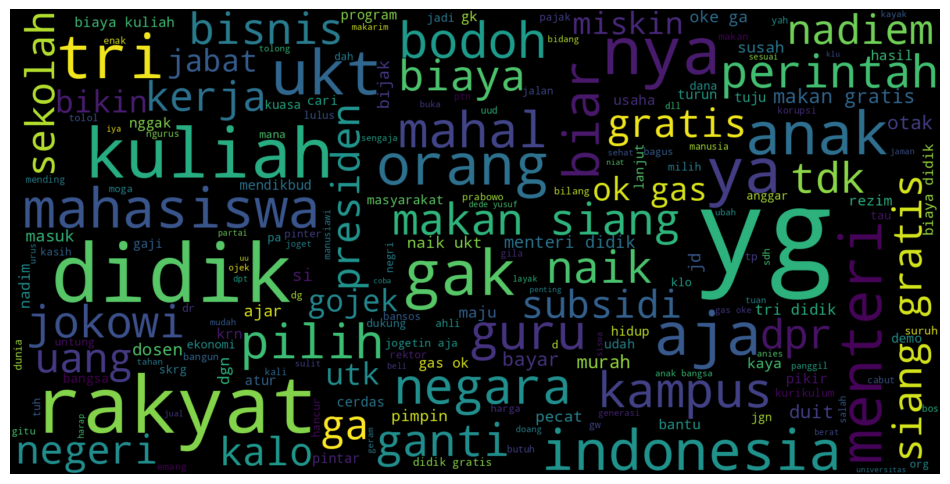

In [ ]:
#Word Cloud for negatif review
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:

tokens = neg_text.split()  # Split the text into individual words
# Count the frequency of each word
word_freq = Counter(tokens)
# Sort the words based on their frequencies in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
# Print the top 10 words and their frequencies
print("Top 10 kata negatif dan jumlahnya:")
for word, freq in sorted_word_freq[:10]:
    print(f"{word}: {freq}")

Top 10 kata negatif dan jumlahnya:
yg: 361
didik: 224
rakyat: 141
kuliah: 122
gratis: 118
ukt: 105
tri: 100
aja: 100
menteri: 98
makan: 94


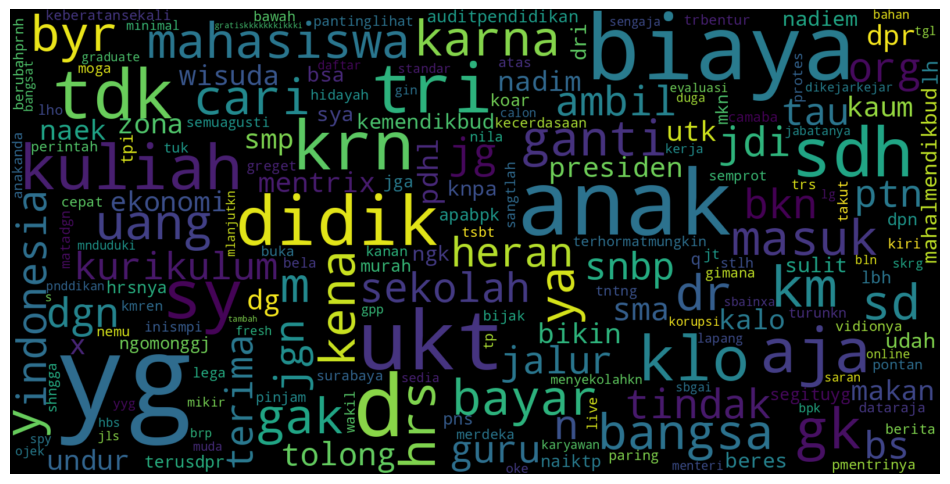

In [ ]:
#Word Cloud for positif review
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
tokens = pos_text.split()  # Split the text into individual words
# Count the frequency of each word
word_freq = Counter(tokens)
# Sort the words based on their frequencies in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
# Print the top 10 words and their frequencies
print("Top 10 kata positif dan jumlahnya:")
for word, freq in sorted_word_freq[:10]:
    print(f"{word}: {freq}")

Top 10 kata positif dan jumlahnya:
yg: 20
biaya: 11
anak: 11
d: 10
ukt: 9
tri: 6
didik: 6
tdk: 6
sdh: 6
krn: 6


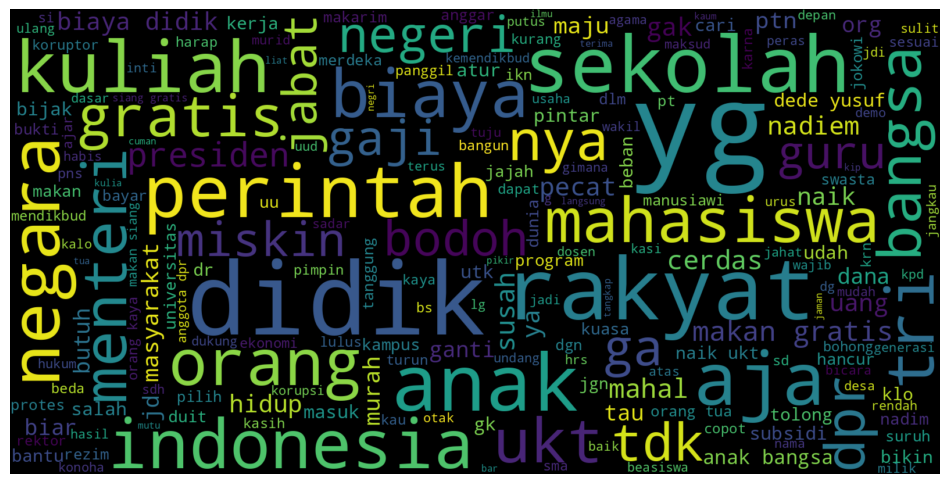

In [ ]:
#Word Cloud for netral review
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(net_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
tokens = net_text.split()  # Split the text into individual words
# Count the frequency of each word
word_freq = Counter(tokens)
# Sort the words based on their frequencies in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
# Print the top 10 words and their frequencies
print("Top 10 kata netral dan jumlahnya:")
for word, freq in sorted_word_freq[:10]:
    print(f"{word}: {freq}")

Top 10 kata netral dan jumlahnya:
yg: 109
didik: 92
rakyat: 57
anak: 57
sekolah: 46
biaya: 45
gratis: 44
orang: 42
aja: 41
perintah: 40


In [ ]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(data['stemming_data'], data['sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Initialize Sastrawi stopword remover

stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

In [ ]:
def preprocess_text(text):
    # Convert to string
    if not isinstance(text, str):
        text = str(text)
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word.lower() not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

In [ ]:
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

In [ ]:
print(X_train.head())
print(X_test.head())

591    jaman berat generasi yg ancam mindset nya dar ...
184                            metrinya sok pinter pecat
743    hancur dah hancur bodoh hidup bangsa jaman gil...
178    yg jls d duga korupsi krn tgl brp bln lg hbs j...
597                                            tri becus
Name: stemming_data, dtype: object
694       sekolah mahal anak pintar lunta tdk didik layak
1115    anak usaha dapat bnyk pns ukt murah dapat mert...
58      bbm harga sembako ukt roket ulah aja orang men...
70           bisnisman suruh ngurus didik yaudah deh duit
1030    cabut revisi tuju bela mahasiswa kuliah gratis...
Name: stemming_data, dtype: object


In [ ]:
# Preprocess the text data by removing stopwords

X_train = X_train.apply(lambda x: stopword_remover.remove(x))
X_test = X_test.apply(lambda x: stopword_remover.remove(x))

In [ ]:
# Extract TF-IDF features
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Convert the TF-IDF matrix to a DataFrame for better visualization

tfidf_train_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_test_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf.get_feature_names_out())

In [ ]:
# Display the first few rows of the TF-IDF DataFrame

print("TF-IDF features for the training data:")
print(tfidf_train_df.head())

TF-IDF features for the training data:
   aaanjiiiiiiiiinnnngggggg  aamiin  aansiwara  abdi  abis  absurd   ac  \
0                       0.0     0.0        0.0   0.0   0.0     0.0  0.0   
1                       0.0     0.0        0.0   0.0   0.0     0.0  0.0   
2                       0.0     0.0        0.0   0.0   0.0     0.0  0.0   
3                       0.0     0.0        0.0   0.0   0.0     0.0  0.0   
4                       0.0     0.0        0.0   0.0   0.0     0.0  0.0   

   acara  acc  aceh  ...  yuuuk  yyg  zaman  zelesky  zholim  zionis  zolim  \
0    0.0  0.0   0.0  ...    0.0  0.0    0.0      0.0     0.0     0.0    0.0   
1    0.0  0.0   0.0  ...    0.0  0.0    0.0      0.0     0.0     0.0    0.0   
2    0.0  0.0   0.0  ...    0.0  0.0    0.0      0.0     0.0     0.0    0.0   
3    0.0  0.0   0.0  ...    0.0  0.0    0.0      0.0     0.0     0.0    0.0   
4    0.0  0.0   0.0  ...    0.0  0.0    0.0      0.0     0.0     0.0    0.0   

   zona  zonasi  zulhas  
0   0.0  

In [ ]:
# Train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [ ]:
# Predict the sentiments on the test set
y_pred = svm.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7222222222222222


In [ ]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     negatif       0.72      0.99      0.84       165
      netral       0.67      0.09      0.16        64
     positif       0.00      0.00      0.00         5

    accuracy                           0.72       234
   macro avg       0.46      0.36      0.33       234
weighted avg       0.69      0.72      0.63       234



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Show the original text and predicted sentiment
predicted_data = pd.DataFrame({'Original_Text': X_test, 'Predicted_Sentiment': y_pred})

In [ ]:
# Display the first few rows of the DataFrame with predictions
print(predicted_data.head())

                                          Original_Text Predicted_Sentiment
694     sekolah mahal anak pintar lunta tdk didik layak             negatif
1115  anak usaha bnyk pns ukt murah merta langsung u...              netral
58    bbm harga sembako ukt roket ulah aja orang men...             negatif
70         bisnisman suruh ngurus didik yaudah deh duit             negatif
1030  cabut revisi tuju bela mahasiswa kuliah gratis...             negatif
